In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, BisectingKMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./ae_scores.csv', index_col=0)
df.head()

,scores0,scores1,scores2,scores3,labels
0,0.015366,0.033622,0.019755,0.051129,5
1,0.015107,0.042163,0.027218,0.066016,5
2,0.021128,0.048342,0.036074,0.073334,5
3,0.008867,0.038759,0.027440,0.048807,5
4,0.005918,0.039020,0.025115,0.030302,5


In [3]:
labels = df.pop('labels')
df.head()

,scores0,scores1,scores2,scores3
0,0.015366,0.033622,0.019755,0.051129
1,0.015107,0.042163,0.027218,0.066016
2,0.021128,0.048342,0.036074,0.073334
3,0.008867,0.038759,0.027440,0.048807
4,0.005918,0.039020,0.025115,0.030302


Text(0, 0.5, 'ssd')

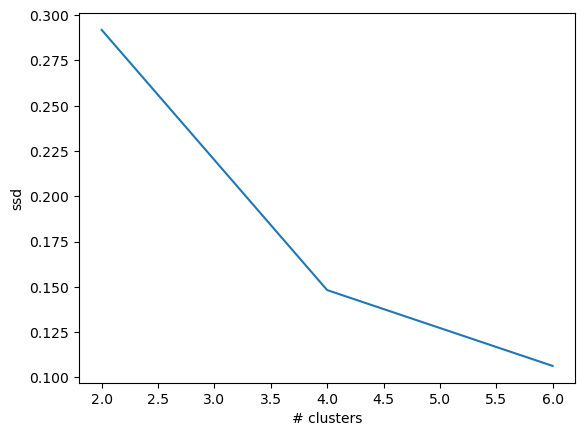

In [4]:
# cluster on scores with different num of clusters
# choose num of clusters based on ssd
ssds = []
ns = []
for n in range(2, 8, 2):
    km = KMeans(n_clusters=n, n_init=5, init='k-means++')
    kmclust = km.fit_predict(df)
    ssds.append(km.inertia_)
    ns.append(n)
    
plt.plot(ns, ssds)
plt.xlabel('# clusters')
plt.ylabel('ssd')

# bkm = BisectingKMeans(n_clusters=10, n_init=5, init='k-means++', bisecting_strategy='biggest_inertia')
# bkmclust = bkm.fit_predict(nonzerofeats)

In [5]:
# k-means with 4 clusters
km = KMeans(n_clusters=4, n_init=5, init='k-means++')
kmclust = km.fit_predict(df)

In [6]:
df['kmclust'] = kmclust
df['labels'] = labels
df.head()

,scores0,scores1,scores2,scores3,kmclust,labels
0,0.015366,0.033622,0.019755,0.051129,3,5
1,0.015107,0.042163,0.027218,0.066016,3,5
2,0.021128,0.048342,0.036074,0.073334,2,5
3,0.008867,0.038759,0.027440,0.048807,3,5
4,0.005918,0.039020,0.025115,0.030302,3,5


In [7]:
df.kmclust.value_counts()

3    112
1    105
0    101
2     82
Name: kmclust, dtype: int64

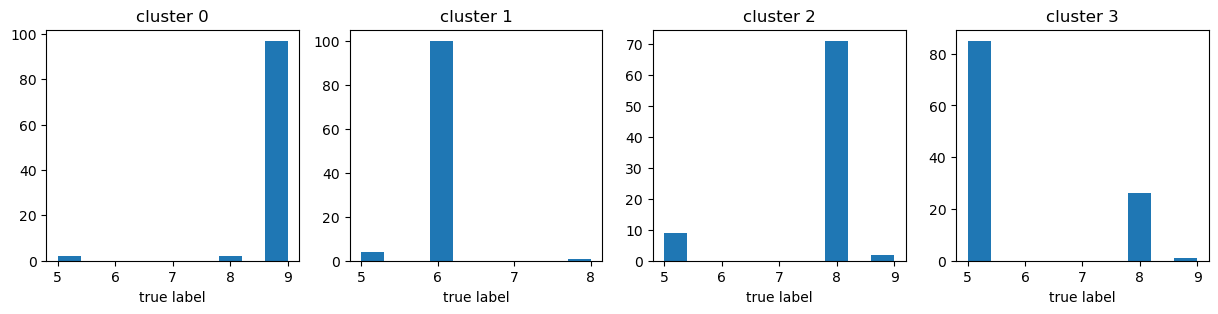

In [8]:
# distribution of each label within clusters
fig, ax = plt.subplots(1,4, figsize=(15,3))
axs = ax.ravel()
for i in range(4):
    axs[i].hist(df.loc[df['kmclust']== i, 'labels'])
    axs[i].set_title(f'cluster {i}')
    axs[i].set_xlabel('true label')